<a href="https://colab.research.google.com/github/MLuc123/DS3001-SP26/blob/main/assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
import pandas as pd
import numpy as np

url=('https://raw.githubusercontent.com/UVA-DS-CP/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv')
df_airbnb=pd.read_csv(url)

df_airbnb['Price_clean'] = (df_airbnb['Price']
                            .astype(str)
                            .str.replace('$', '', regex=False)
                            .str.replace(',', '', regex=False)
                            .astype(float))

missing_count=df_airbnb["Price_clean"].isna().sum()
print(f"Missing vaues in price: {missing_count}")


Missing vaues in price: 0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Year range: 0.0 to 2026.0
Proportion Male: 78.70%

Type Distribution:
Type_Clean
Unprovoked    0.744669
Unknown       0.160824
Provoked      0.094507
Name: proportion, dtype: float64
Using column named: 'Fatal Y/N'
Fatal_Clean
N          4289
Y           830
Unknown     415
Name: count, dtype: int64

--- Sex vs Type ---
Type_Clean  Provoked   Unknown  Unprovoked
Sex                                       
F           0.038674  0.109116    0.852210
M           0.103559  0.124684    0.771757
M x 2       0.000000  1.000000    0.000000
lli         0.000000  0.000000    1.000000
m           0.000000  0.000000    1.000000
nan         0.097345  0.590708    0.311947

--- Type vs Fatal ---
Fatal_Clean         N   Unknown         Y
Type_Clean                               
Provoked     0.963671  0.011472  0.024857
Unknown      0.419101  0.441573  0.139326
Unprovoked   0.827954  0.003883  0.168163

--- Sex vs Fatal ---
Fatal_Clean         N   Unknown         Y
Sex                                  

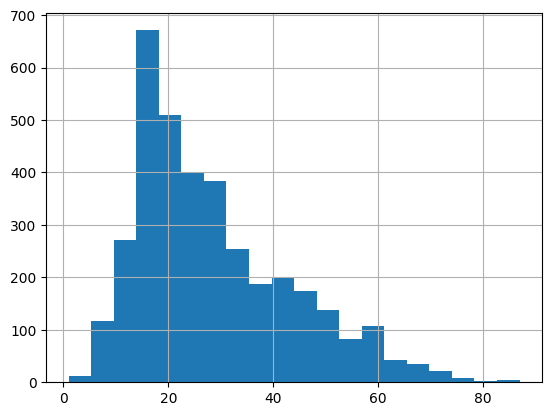

In [ ]:
import pandas as pd
import numpy as np

df_shark = pd.read_excel('GSAF5.xls')

df_shark.columns = df_shark.columns.str.strip()

df_shark = df_shark.dropna(axis=1, how='all')

df_shark['Year'] = pd.to_numeric(df_shark['Year'], errors='coerce')
print(f"Year range: {df_shark['Year'].min()} to {df_shark['Year'].max()}")
df_shark = df_shark[df_shark['Year'] >= 1940].copy()

df_shark['Age'] = pd.to_numeric(df_shark['Age'], errors='coerce')
df_shark['Age'].hist(bins=20)

df_shark['Sex'] = df_shark['Sex'].astype(str).str.strip()
male_prop = (df_shark['Sex'] == 'M').mean()
print(f"Proportion Male: {male_prop:.2%}")

def clean_type(t):
    if pd.isna(t): return 'Unknown'
    t = str(t).strip()
    if 'Provoked' in t: return 'Provoked'
    if 'Unprovoked' in t: return 'Unprovoked'
    return 'Unknown'

df_shark['Type_Clean'] = df_shark['Type'].apply(clean_type)
print("\nType Distribution:")
print(df_shark['Type_Clean'].value_counts(normalize=True))

fatal_col_name = [col for col in df_shark.columns if 'Fatal' in col][0]
print(f"Using column named: '{fatal_col_name}'")

def clean_fatal(f):
    if pd.isna(f): return 'Unknown'
    f = str(f).upper().strip()
    if 'Y' in f: return 'Y'
    if 'N' in f: return 'N'
    return 'Unknown'

df_shark['Fatal_Clean'] = df_shark[fatal_col_name].apply(clean_fatal)
print(df_shark['Fatal_Clean'].value_counts())

print("\n--- Sex vs Type ---")
print(pd.crosstab(df_shark['Sex'], df_shark['Type_Clean'], normalize='index'))

print("\n--- Type vs Fatal ---")
print(pd.crosstab(df_shark['Type_Clean'], df_shark['Fatal_Clean'], normalize='index'))

print("\n--- Sex vs Fatal ---")
print(pd.crosstab(df_shark['Sex'], df_shark['Fatal_Clean'], normalize='index'))

df_shark['Species_Clean'] = df_shark['Species'].fillna('').astype(str).str.lower()
white_shark_prop = df_shark['Species_Clean'].apply(lambda x: 'white' in x.split()).mean()

print(f"\nProportion involving White Sharks: {white_shark_prop:.2%}")

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
    This paper is about the importance of data cleaning, and specifically tidying as a vital part of data analysis. It proposes the the standard way to organize data values - tidy data - to make analysis, visualization, and tool development easier.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
    The tidy data standard intends to simplify the process od data analysis by ensuring that data structures are consistant. If data is always store in the same way or organize data values, tiny data, analysis, visualization, and tool development are easier and more consistant

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way."
    This means that ddatasets always have the same structure, allowing the use of standard tools, but messy data sets are a contrast to this because they are broken up in unpredictable ways which requires a custom solution for each file.
  
  What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
    This means that while a human can look at a spreadsheet and identify a column as age it is difficult to create a strict definition of a variable that applies to every possible data set without context.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?
    Wickham defines values as numbers or strings, variables as measures or attributes, and observations as all values measured on the same unit.
  
  5. How is "Tidy Data" defined in section 2.3?
    Tiny data refers to data defined by three rules. 1. Each variable forms a column. 2. Each observation forms a row. 3. Each type of observational unit forms a table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
    The five most common problems with messy datasets are 1. column headers are values and not variable names 2. multiple variables are stored in one column 3. variables are stored in both rows and columns 4. multiple types of observational units are stored in the same table 5. a single observational unit is stored multiple times.
    Table 4 is messy because the headers are values and not variable names, which should be insde the cells under a variable like 'Income'.
    Melting is the process of transforming a wie dataset into a long dataset. It incolves taking columns that represents values and stacking them into a single column.
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
    Table 11 is messy because it has variables in both columns and rows and table 12 is molten because the day colums have been melted down and now has a specific column for dat and a column for value. It has a tidy structure.
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
    The chicken egg problem is the idea that tool developers dont build tools that expect tidy data because little real world data is tidy. On the other hand, data analysts dont bother tidying data because there are not easy enough tools that require or automate it. Wickham hopes that data wranging will become a recognized part of statistics and stat science which will lead to better toold for cleaning and standardizing data.